# **<font color=blue>Coronavirus-Vaccination</font>**
---
The website OurWorldInData.org is updating the number of vaccinations around the world on a daily basis.

# Step 1 - Data exploration and preparation
Exploring the internet searching for information about coronavirus vaccination, it was selected the following sources:
1. https://covid.ourworldindata.org/data/owid-covid-data.csv 
Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina and Joe Hasell (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus'

# Step 2 - Data extraction
In this step the data was extracted from the source mentioned on Step 1. 
We will take only data about vaccinations, cases, deaths.

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,}'.format

In [2]:
try:
    from urllib.request import Request, urlopen  # Python 3
except ImportError:
    from urllib2 import Request, urlopen  # Python 2

req = Request('https://covid.ourworldindata.org/data/owid-covid-data.csv')
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
content = urlopen(req)

# reading the file with the information about coronavirus direct from the website mentioned above on item 1
df_virus = pd.read_csv(content,
                       usecols=['iso_code','continent','location','date','total_cases','total_deaths','icu_patients','hosp_patients','total_vaccinations','people_fully_vaccinated','stringency_index','population','population_density','gdp_per_capita','life_expectancy','human_development_index'],
                       )

# take the date from the file to show to user the last date of the update
update = df_virus['date'].max()
print(f"Last update: {update}")

Last update: 2021-04-09


# Step 3 - Data cleansing
In this step we will drop/rename some columns and rows that we will not use or wrong

After cleansing we will create the file:
- vaccination.xlsx 

In [3]:
df_virus[(df_virus['iso_code']=='AUS')]

,iso_code,continent,location,date,total_cases,total_deaths,icu_patients,hosp_patients,total_vaccinations,people_fully_vaccinated,stringency_index,population,population_density,gdp_per_capita,life_expectancy,human_development_index
4184,AUS,Oceania,Australia,2020-01-26,4.0,nan,nan,nan,nan,nan,11.11,"25,499,881.0",3.202,"44,648.71",83.44,0.9440000000000001
4185,AUS,Oceania,Australia,2020-01-27,5.0,nan,nan,nan,nan,nan,11.11,"25,499,881.0",3.202,"44,648.71",83.44,0.9440000000000001
4186,AUS,Oceania,Australia,2020-01-28,5.0,nan,nan,nan,nan,nan,11.11,"25,499,881.0",3.202,"44,648.71",83.44,0.9440000000000001
4187,AUS,Oceania,Australia,2020-01-29,6.0,nan,nan,nan,nan,nan,11.11,"25,499,881.0",3.202,"44,648.71",83.44,0.9440000000000001
4188,AUS,Oceania,Australia,2020-01-30,9.0,nan,nan,nan,nan,nan,11.11,"25,499,881.0",3.202,"44,648.71",83.44,0.9440000000000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,AUS,Oceania,Australia,2021-04-04,"29,357.0",909.0,nan,nan,"843,182.0",nan,46.76,"25,499,881.0",3.202,"44,648.71",83.44,0.9440000000000001
4619,AUS,Oceania,Australia,2021-04-05,"29,365.0",909.0,nan,nan,"844,309.0",nan,nan,"25,499,881.0",3.202,"44,648.71",83.44,0.9440000000000001
4620,AUS,Oceania,Australia,2021-04-06,"29,379.0",909.0,nan,nan,"854,983.0",nan,nan,"25,499,881.0",3.202,"44,648.71",83.44,0.9440000000000001
4621,AUS,Oceania,Australia,2021-04-07,"29,385.0",909.0,nan,nan,"920,334.0",nan,nan,"25,499,881.0",3.202,"44,648.71",83.44,0.9440000000000001


In [4]:
# drop all rows that column iso_code is null/NaN
df_virus.dropna(subset=['iso_code'], inplace=True)
df_virus.dropna(subset=['continent'], inplace=True)

# replace the columns with NaN values with 0
df_virus.fillna(0, inplace=True)

# drop all rows that iso_code is OWID_WRL(World)
df_virus.drop(df_virus[(df_virus['iso_code'] =='OWID_WRL') | (df_virus['iso_code'] == 'OWID_EUN') | (df_virus['iso_code'] == 'OWID_CYN')].index, inplace=True)

df_virus.replace('OWID_KOS','KOS',inplace=True)

In [5]:
# let´s create df_country with the totalization of values per country
df_country = df_virus[['continent','location','date','total_cases','total_deaths','total_vaccinations','people_fully_vaccinated','population','population_density','gdp_per_capita','life_expectancy','human_development_index']].groupby(df_virus['iso_code']).last()
df_country.reset_index(inplace=True)

In [6]:
df_virus['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

### Let´s check the vaccination from Ireland(IRL)

In [7]:
df_virus[(df_virus['iso_code']=='IRL')].tail(5) # the values at the last date are Zeros

,iso_code,continent,location,date,total_cases,total_deaths,icu_patients,hosp_patients,total_vaccinations,people_fully_vaccinated,stringency_index,population,population_density,gdp_per_capita,life_expectancy,human_development_index
35463,IRL,Europe,Ireland,2021-04-04,"238,148.0","4,718.0",58.0,242.0,0.0,0.0,0.0,"4,937,796.0",69.874,"67,335.293",82.3,0.955
35464,IRL,Europe,Ireland,2021-04-05,"238,466.0","4,718.0",0.0,0.0,"940,883.0","273,701.0",0.0,"4,937,796.0",69.874,"67,335.293",82.3,0.955
35465,IRL,Europe,Ireland,2021-04-06,"238,907.0","4,727.0",0.0,0.0,0.0,0.0,0.0,"4,937,796.0",69.874,"67,335.293",82.3,0.955
35466,IRL,Europe,Ireland,2021-04-07,"239,325.0","4,732.0",0.0,0.0,0.0,0.0,0.0,"4,937,796.0",69.874,"67,335.293",82.3,0.955
35467,IRL,Europe,Ireland,2021-04-08,"239,723.0","4,737.0",0.0,0.0,0.0,0.0,0.0,"4,937,796.0",69.874,"67,335.293",82.3,0.955


In [8]:
df_country[(df_country['iso_code']=='IRL')] # we need to update the vaccination from the last date that has information

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,life_expectancy,human_development_index
88,IRL,Europe,Ireland,2021-04-08,"239,723.0","4,737.0",0.0,0.0,"4,937,796.0",69.874,"67,335.293",82.3,0.955


### We need to update correctly the columns with the last information that we have information per country

In [9]:
# the values of vaccinations(total_vaccinations and people_fully_vaccinated) are not updated in every date, so we need to get the last values
df_vacc = df_virus[['total_vaccinations','people_fully_vaccinated']][(df_virus['total_vaccinations'] > 0)].groupby(df_virus['iso_code']).last()

df_country = df_country.set_index('iso_code')
df_country.update(df_vacc)
df_country.reset_index(inplace=True)
df_country[(df_country['iso_code']=='IRL')] # Now the values of vaccination are updated

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,life_expectancy,human_development_index
88,IRL,Europe,Ireland,2021-04-08,"239,723.0","4,737.0","940,883.0","273,701.0","4,937,796.0",69.874,"67,335.293",82.3,0.955


### Now let´s create some columns with the percentage of vaccination

In [10]:
# create some columns with percentage of vaccinations on df_country
df_country['One dose'] = df_country['total_vaccinations'] - df_country['people_fully_vaccinated'] 
df_country['Perc One dose'] = df_country['One dose'] / df_country['population'] * 100
df_country['Perc Full dose'] = df_country['people_fully_vaccinated'] / df_country['population'] * 100

# create a df_continent with totalization of values per continent
df_continent = df_country[['total_cases','total_deaths','total_vaccinations','people_fully_vaccinated','population']].groupby(df_country['continent']).sum()


# create some columns with percentage of vaccinations on df_continent
df_continent['One dose'] = df_continent['total_vaccinations'] - df_continent['people_fully_vaccinated'] 
df_continent['Perc One dose'] = df_continent['One dose'] / df_continent['population'] * 100
df_continent['Perc Full dose'] = df_continent['people_fully_vaccinated'] / df_continent['population'] * 100

df_continent.reset_index(inplace=True)

In [11]:
df_continent

,continent,total_cases,total_deaths,total_vaccinations,people_fully_vaccinated,population,One dose,Perc One dose,Perc Full dose
0,Africa,"4,318,252.0","114,937.0","12,884,136.0","4,431,536.0","1,338,832,662.0","8,452,600.0",0.6313410361062732,0.3309999916927632
1,Asia,"29,517,658.0","435,627.0","330,857,359.0","31,894,342.0","4,608,037,423.0","298,963,017.0",6.487860005385205,0.6921458979652909
2,Europe,"41,352,287.0","943,315.0","146,431,040.0","39,070,307.0","751,380,385.0","107,360,733.0",14.288466287285367,5.19980395815097
3,North America,"35,791,663.0","818,017.0","195,536,044.0","68,990,912.0","587,907,004.0","126,545,132.0",21.524685220453676,11.735004266082871
4,Oceania,"39,887.0","1,005.0","1,088,681.0","19,273.0","41,532,238.0","1,069,408.0",2.5748865254985778,0.046404915622413605
5,South America,"22,087,381.0","582,714.0","46,704,345.0","11,852,806.0","430,461,090.0","34,851,539.0",8.096327359111598,2.753513912256274


In [12]:
df_country[(df_country['iso_code']=='IRL')]

,iso_code,continent,location,date,total_cases,total_deaths,total_vaccinations,people_fully_vaccinated,population,population_density,gdp_per_capita,life_expectancy,human_development_index,One dose,Perc One dose,Perc Full dose
88,IRL,Europe,Ireland,2021-04-08,"239,723.0","4,737.0","940,883.0","273,701.0","4,937,796.0",69.874,"67,335.293",82.3,0.955,"667,182.0",13.511736815372688,5.542979094316574


In [13]:
df_country['One dose'] = df_country['total_vaccinations'] - df_country['people_fully_vaccinated'] 
df_country['Perc One dose'] = df_country['One dose'] / df_country['population'] * 100
df_country['Perc Full dose'] = df_country['people_fully_vaccinated'] / df_country['population'] * 100
df_country.reset_index(inplace=True)

df_continent = df_country[['total_cases','total_deaths','total_vaccinations','people_fully_vaccinated','population']].groupby(df_country['continent']).sum()
df_continent['One dose'] = df_continent['total_vaccinations'] - df_continent['people_fully_vaccinated'] 
df_continent['Perc One dose'] = df_continent['One dose'] / df_continent['population'] * 100
df_continent['Perc Full dose'] = df_continent['people_fully_vaccinated'] / df_continent['population'] * 100
df_continent.reset_index(inplace=True)

### Create excel files with cleaned data 

In [16]:
# create a excel file with daily cases and deaths per date(only information related to coronavirus)
df_virus.to_excel("Files//vaccination.xlsx",index=False)
print(f"File vaccination.xlsx created.")

File vaccination.xlsx created.


# Step 4 - Descriptive Statistic
In this step we can check some basic statitisc data

In [17]:
df_country.shape

(205, 17)

In [18]:
df_country.columns

Index(['index', 'iso_code', 'continent', 'location', 'date', 'total_cases',
       'total_deaths', 'total_vaccinations', 'people_fully_vaccinated',
       'population', 'population_density', 'gdp_per_capita', 'life_expectancy',
       'human_development_index', 'One dose', 'Perc One dose',
       'Perc Full dose'],
      dtype='object')

In [19]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    205 non-null    int64  
 1   iso_code                 205 non-null    object 
 2   continent                205 non-null    object 
 3   location                 205 non-null    object 
 4   date                     205 non-null    object 
 5   total_cases              205 non-null    float64
 6   total_deaths             205 non-null    float64
 7   total_vaccinations       205 non-null    float64
 8   people_fully_vaccinated  205 non-null    float64
 9   population               205 non-null    float64
 10  population_density       205 non-null    float64
 11  gdp_per_capita           205 non-null    float64
 12  life_expectancy          205 non-null    float64
 13  human_development_index  205 non-null    float64
 14  One dose                 2

In [20]:
df_continent

,continent,total_cases,total_deaths,total_vaccinations,people_fully_vaccinated,population,One dose,Perc One dose,Perc Full dose
0,Africa,"4,318,252.0","114,937.0","12,884,136.0","4,431,536.0","1,338,832,662.0","8,452,600.0",0.6313410361062732,0.3309999916927632
1,Asia,"29,517,658.0","435,627.0","330,857,359.0","31,894,342.0","4,608,037,423.0","298,963,017.0",6.487860005385205,0.6921458979652909
2,Europe,"41,352,287.0","943,315.0","146,431,040.0","39,070,307.0","751,380,385.0","107,360,733.0",14.288466287285367,5.19980395815097
3,North America,"35,791,663.0","818,017.0","195,536,044.0","68,990,912.0","587,907,004.0","126,545,132.0",21.524685220453676,11.735004266082871
4,Oceania,"39,887.0","1,005.0","1,088,681.0","19,273.0","41,532,238.0","1,069,408.0",2.5748865254985778,0.046404915622413605
5,South America,"22,087,381.0","582,714.0","46,704,345.0","11,852,806.0","430,461,090.0","34,851,539.0",8.096327359111598,2.753513912256274


# Step 5 - Data Visualization
In this step we can visualize some data using graphs

In [21]:
import matplotlib.pyplot as plt

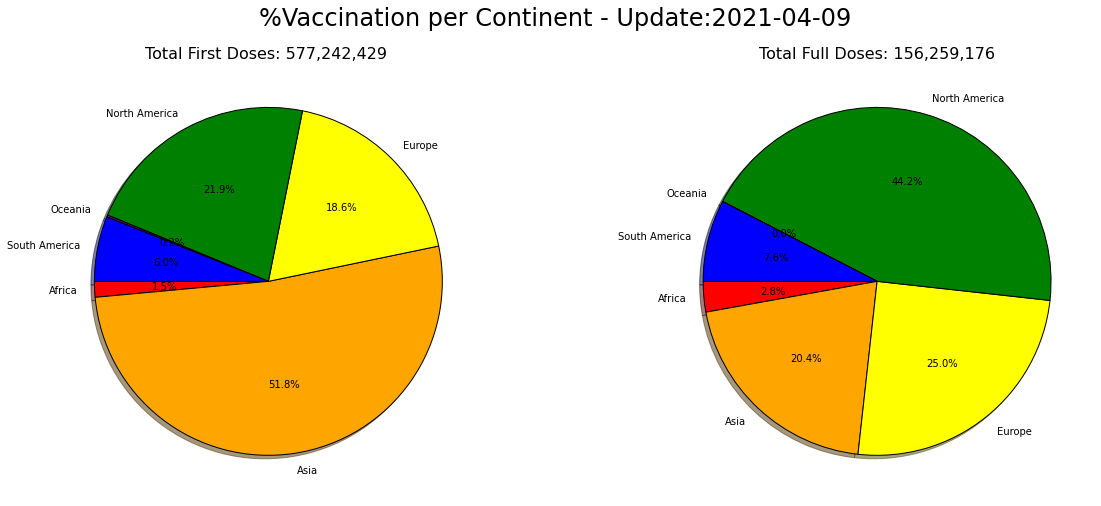

In [22]:
doses_one = df_continent['One dose'].sum()
doses_full = df_continent['people_fully_vaccinated'].sum()
colors=['red','orange','yellow','green','purple','blue']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
plt.suptitle(f'%Vaccination per Continent - Update:{update}',fontsize=24)

ax1.pie(df_continent['One dose'], labels=df_continent['continent'], autopct='%1.1f%%',shadow=True, startangle=180, colors=colors, wedgeprops={'edgecolor':'black'})

ax1.set_title(f'Total First Doses: {doses_one:,.0f} ',fontsize=16)

ax2.pie(df_continent['people_fully_vaccinated'], labels=df_continent['continent'], autopct='%1.1f%%',shadow=True, startangle=180, colors=colors, wedgeprops={'edgecolor':'black'})
ax2.set_title(f'Total Full Doses: {doses_full:,.0f}',fontsize=16)

plt.show()

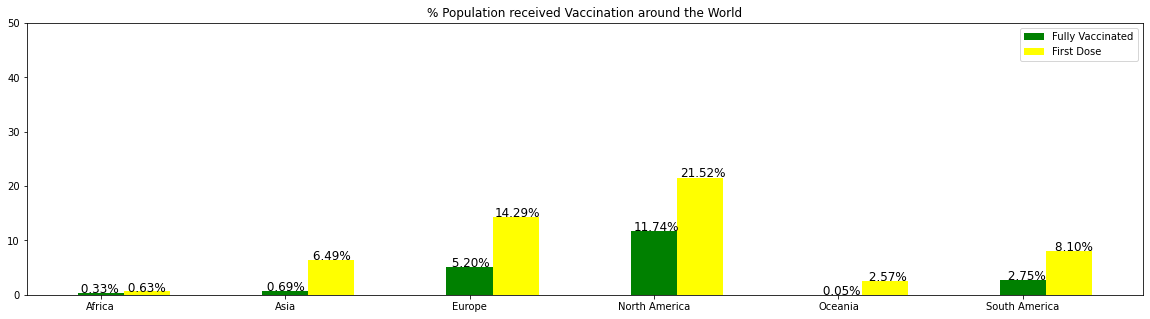

In [23]:
import numpy as np
x  = df_continent['continent']
# to put the column bar side by side we need to specify the length of the bar using width
x_indexes = np.arange(len(x))
width = 0.25

y1 = df_continent['Perc Full dose']
y2 = df_continent['Perc One dose']

# figure is the figure that hold the graphs gcf()
# ax is the individual graphs inside the figure gca()
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(20,5)) # row x col ->return list 
ax.set_ylim((0, 50))
ax.bar(x_indexes,y1, color="green",label='Fully Vaccinated',width=width)
ax.bar(x_indexes+width,y2, color='yellow',linestyle='--',label='First Dose',width=width)
ax.set_title('% Population received Vaccination around the World')

ax.legend()

for p in ax.patches:
    num = f"{p.get_height():5.2f}%"
    ax.annotate(num, (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=12)

plt.xticks(ticks=x_indexes, labels=x)
plt.show()

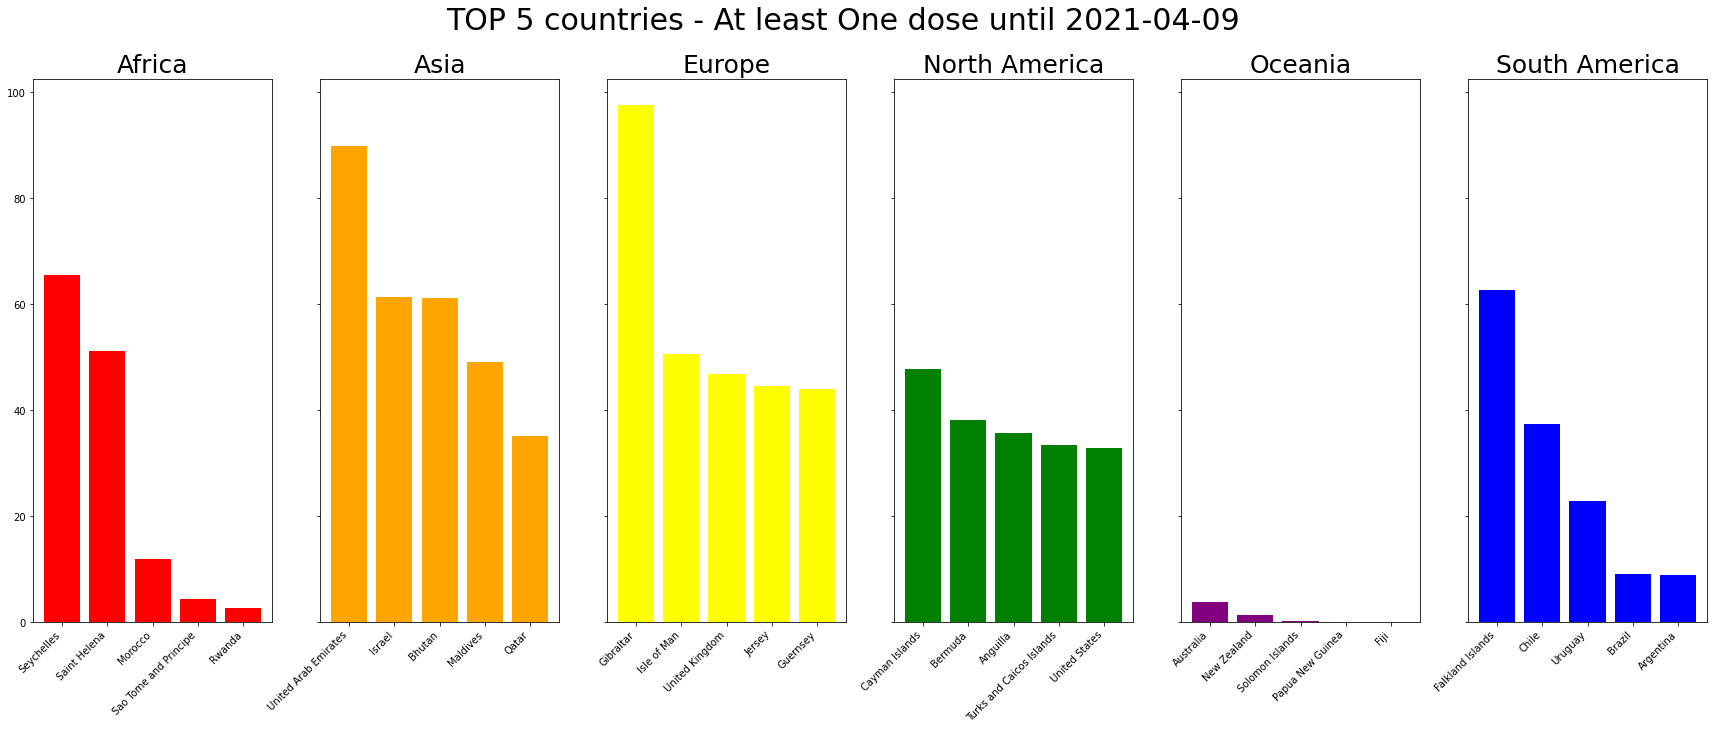

In [24]:
import matplotlib.pyplot as plt
colors=['red','orange','yellow','green','purple','blue']

fig, ax = plt.subplots(1, 6, sharey=True, figsize=(30,10))
fig.suptitle(f'TOP 5 countries - At least One dose until {update}', fontsize=30)

for i, c in enumerate(df_continent['continent']):
    df_top5 = df_country[df_country['continent'] == c].sort_values(by='Perc One dose',ascending=False).head(5)

    ax[i].bar(df_top5['location'], df_top5['Perc One dose'], color=colors[i])
    ax[i].set_title(c,fontsize=25)
    ax[i].set_xticks(df_top5['location'])
    ax[i].set_xticklabels(labels=df_top5['location'], rotation=45, ha='right')

plt.show()

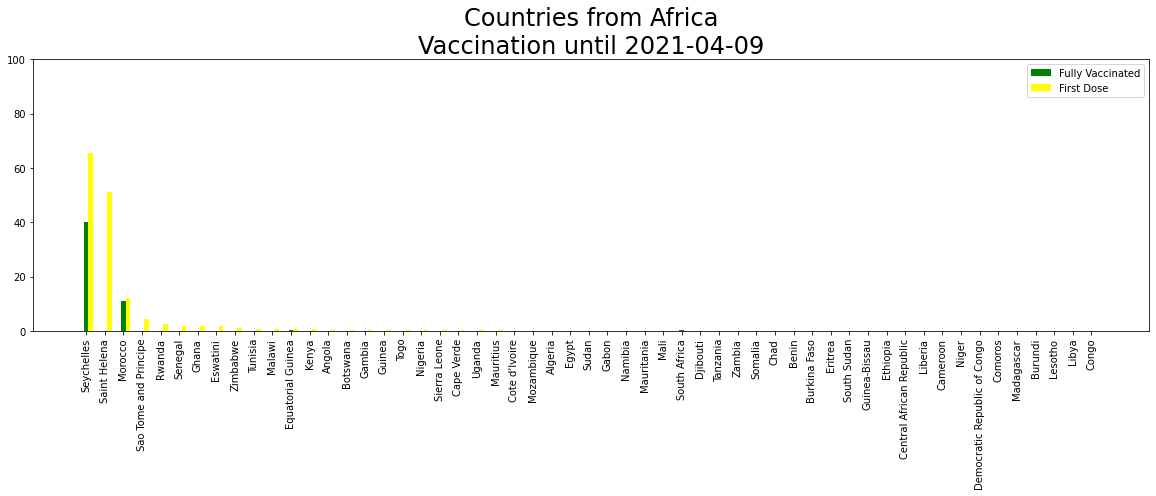

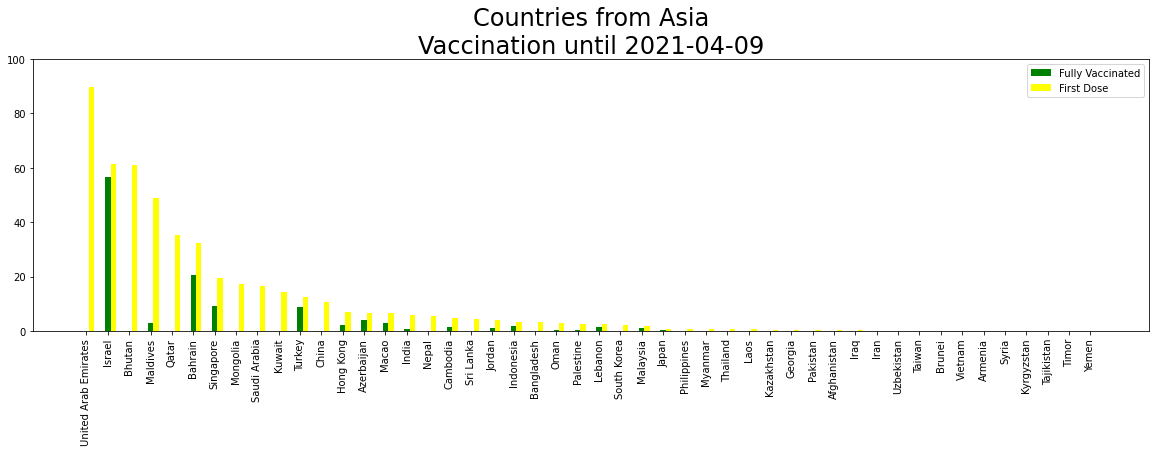

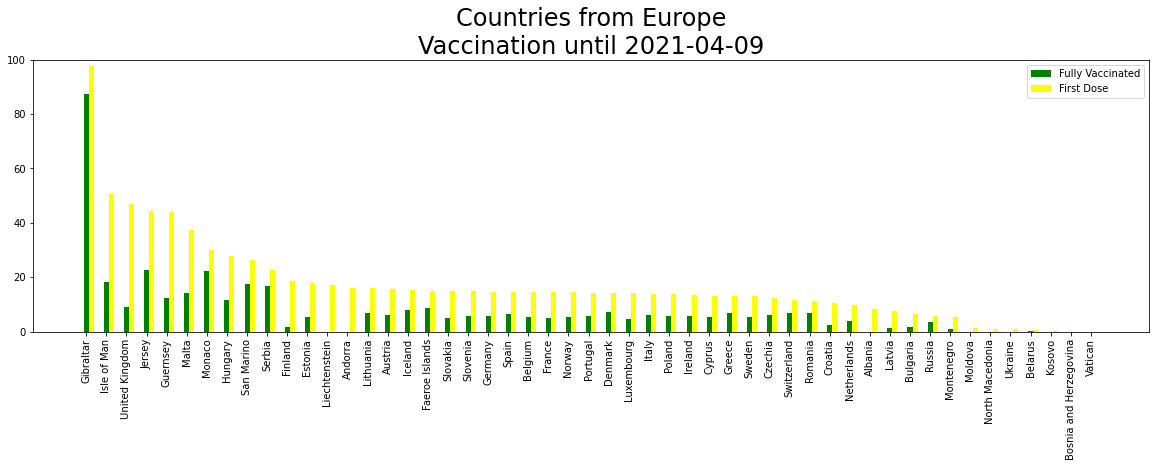

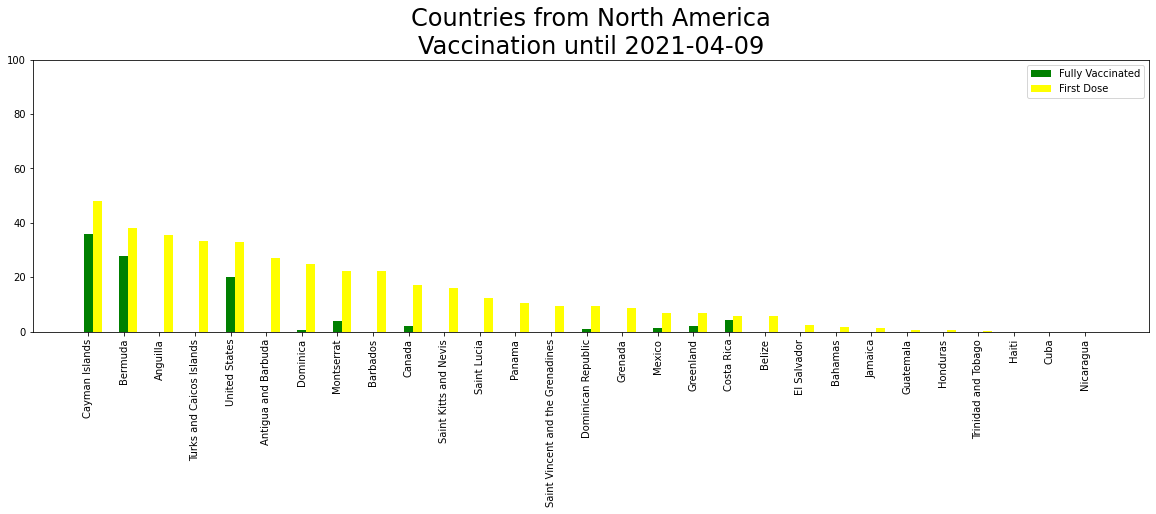

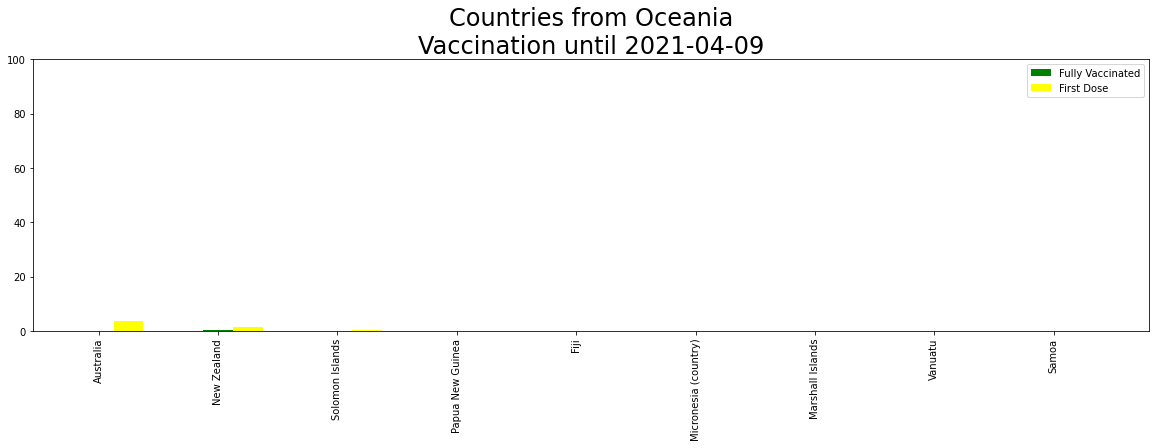

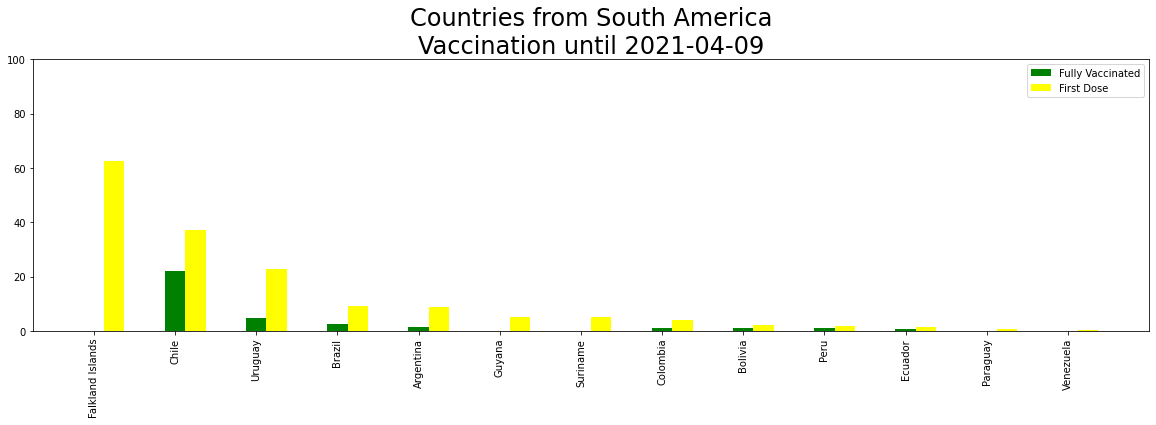

In [25]:
import numpy as np

for color, cont in enumerate(df_continent['continent']):
    df_select = df_country[(df_country['continent'] == cont)].sort_values(by='Perc One dose', ascending=False)

    x  = df_select['location']
    # to put the column bar side by side we need to specify the length of the bar using width
    x_indexes = np.arange(len(x))
    width = 0.25

    y1 = df_select['Perc Full dose']
    y2 = df_select['Perc One dose']

    # figure is the figure that hold the graphs gcf()
    # ax is the individual graphs inside the figure gca()
    fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(20,5)) # row x col ->return list 
    ax.set_ylim((0, 100))
    ax.bar(x_indexes,y1, color="green",label='Fully Vaccinated',width=width)
    ax.bar(x_indexes+width,y2, color='yellow',linestyle='--',label='First Dose',width=width)
    ax.set_title(f'Countries from {cont}\nVaccination until {update}',fontsize = 24)
    ax.legend()

    #for p in ax.patches:
    #    num = f"{p.get_height():5.2f}%"
    #    ax.annotate(num, (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=12)

    plt.xticks(ticks=x_indexes, labels=x, rotation=90)
plt.show()

# Step 6 - Conclusion
Information below was generated with the information obtained through the ourworldindata website until the date: April 09, 2021.

Observing the plots above, from the total of first dose of vaccination in the world, Asia has 51.8% of the total doses and North America has 21.9%.
The continent with the highest percentage of the population that received at least the first dose of the vaccine is North America with 21.52%, followed by Europe with 14.29%.

The population of Africa received less than 1% of the first dose of the vaccine.

Some countries as Gibraltar and United Arab Emirates have more than 80% of the population with the first dose received.